In [1]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
toxicity_df = pd.read_csv('results/toxicity.csv').drop(['createdAt','id'], axis=1)

In [41]:
# List of names to include
names_to_include = ['BASELINE_77_TRIS', 'REFT_VACCINE_77_BIS']  # Example names

# Filter the DataFrame
filtered_toxicity_df = toxicity_df[toxicity_df['name'].isin(names_to_include)]

alpha_dict = {'BASELINE_77_TRIS': 0.8,
              'REFT_VACCINE_77_BIS': 0.5}

size_dict = {'BASELINE_77_TRIS': 80,
              'REFT_VACCINE_77_BIS': 200}

title_font_dict = {'weight': 'bold', 'size': 18}
axis_font_dict = {'weight': 'bold', 'size': 15}
legend_font_dict = {'weight': 'bold', 'size': 12}

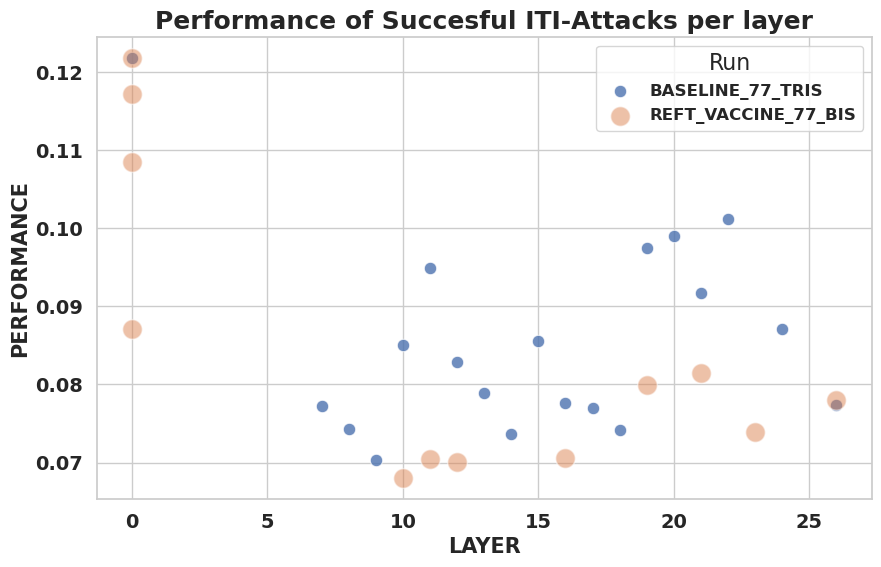

In [42]:

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))

for name in filtered_toxicity_df['name'].unique():
    subset = filtered_toxicity_df[filtered_toxicity_df['name'] == name]
    sns.scatterplot(data=subset,
                    x='layer',
                    y='performance',
                    label=name,
                    alpha=alpha_dict[name],
                    s=size_dict[name])

"""
scatter_plot = sns.scatterplot(data=filtered_toxicity_df,
                               x='layer',
                               y='performance',
                               hue='name',
                               palette='deep',
                               s=100)
"""

# Add title and labels
plt.title('Performance of Succesful ITI-Attacks per layer', fontdict=title_font_dict)
plt.xlabel('LAYER', fontdict=axis_font_dict)
plt.ylabel('PERFORMANCE', fontdict=axis_font_dict)

# Customize ticks
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Show the plot
plt.legend(title='Run', title_fontsize='16', prop=legend_font_dict)
plt.show()
